# Read and Save file

### mdapy can read/save file very efficiently. Including Dump, Data and Dump.gz formats.
### The performance of mdapy is around **2-7 times** higher than ovito.

In [1]:
import mdapy as mp
from time import time
import matplotlib.pyplot as plt
mp.init()

[Taichi] version 1.6.0, llvm 15.0.1, commit f1c6fbbd, win, python 3.10.12
[Taichi] Starting on arch=x64


In [2]:
mp.__version__

'0.9.4'

In [3]:
import ovito
ovito.version

(3, 9, 2)

### Prepare a Data, Dump, Dump.gz files

In [4]:
def prepare():
    FCC = mp.LatticeMaker(3.615, 'FCC', 100, 100, 100)
    FCC.compute()
    print(f'Atom number is {FCC.N}.')
    print('Saving to mdapy.data.')
    FCC.write_data(output_name='mdapy.data')
    print('Saving to mdapy.dump')
    FCC.write_dump(output_name='mdapy.dump')
    print('Saving to mdapy.dump.gz')
    FCC.write_dump(output_name='mdapy.dump.gz', compress=True)
    return FCC.N

In [5]:
N = prepare()

Atom number is 4000000.
Saving to mdapy.data.
Saving to mdapy.dump
Saving to mdapy.dump.gz


### Read a dump file in mdapy

In [6]:
start = time()
for _ in range(3):
    _ = mp.System('mdapy.dump')
end = time()
mdapy_time = (end - start)/3
print(mdapy_time, 's')

0.15567596753438315 s


### Read a dump file in OVITO

In [7]:
start = time()
for _ in range(3):
    _ = ovito.io.import_file('mdapy.dump')
end = time()
ovito_time = (end - start)/3
print(ovito_time, 's')

1.1534826755523682 s


In [8]:
mp.pltset()

Text(0.5, 1.0, 'Read dump with 4000000 atoms.')

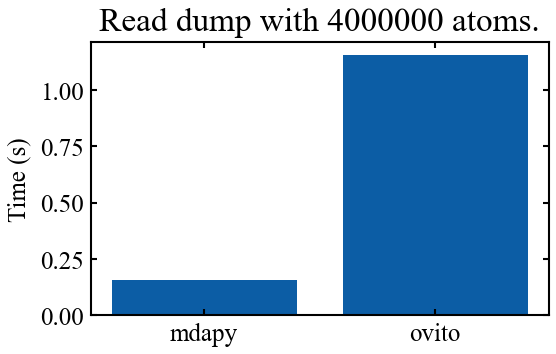

In [9]:
fig = plt.figure(figsize=(mp.cm2inch(10), mp.cm2inch(6)), dpi=150)
plt.bar([0, 1], [mdapy_time, ovito_time])
plt.xticks([0, 1], ['mdapy', 'ovito'])
plt.ylabel('Time (s)')
plt.title(f'Read dump with {N} atoms.')

### Read a data file in mdapy

In [10]:
start = time()
for _ in range(3):
    _ = mp.System('mdapy.data')
end = time()
mdapy_time = (end - start)/3
print(mdapy_time, 's')

0.6816030343373617 s


### Read a data file in ovito

In [11]:
start = time()
for _ in range(3):
    _ = ovito.io.import_file('mdapy.data')
end = time()
ovito_time = (end - start)/3
print(ovito_time, 's')

2.7071162859598794 s


Text(0.5, 1.0, 'Read data with 4000000 atoms.')

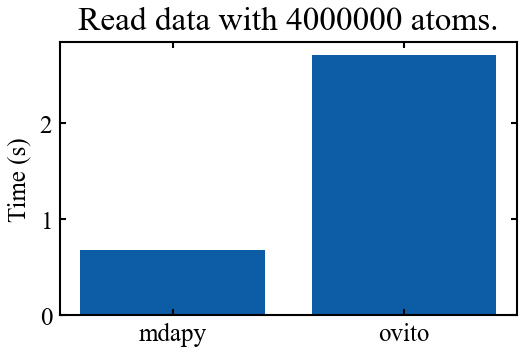

In [12]:
fig = plt.figure(figsize=(mp.cm2inch(10), mp.cm2inch(6)), dpi=150)
plt.bar([0, 1], [mdapy_time, ovito_time])
plt.xticks([0, 1], ['mdapy', 'ovito'])
plt.ylabel('Time (s)')
plt.title(f'Read data with {N} atoms.')

### Read a dump.gz file in mdapy

In [13]:
start = time()
for _ in range(3):
    _ = mp.System('mdapy.dump.gz')
end = time()
mdapy_time = (end - start)/3
print(mdapy_time, 's')

0.6246785322825114 s


### Read a dump.gz file in ovito

In [14]:
start = time()
for _ in range(3):
    _ = ovito.io.import_file('mdapy.dump.gz')
end = time()
ovito_time = (end - start)/3
print(ovito_time, 's')

1.8149317105611165 s


Text(0.5, 1.0, 'Read dump.gz with 4000000 atoms.')

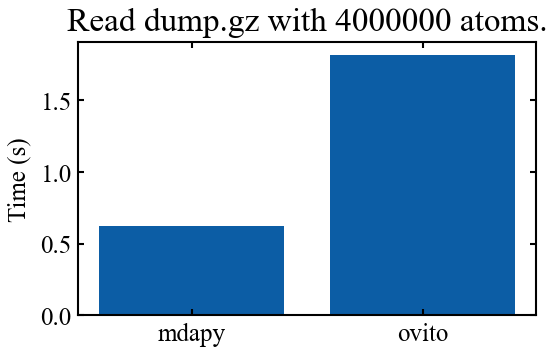

In [15]:
fig = plt.figure(figsize=(mp.cm2inch(10), mp.cm2inch(6)), dpi=150)
plt.bar([0, 1], [mdapy_time, ovito_time])
plt.xticks([0, 1], ['mdapy', 'ovito'])
plt.ylabel('Time (s)')
plt.title(f'Read dump.gz with {N} atoms.')

### Save a dump file in mdapy

In [16]:
system = mp.System('mdapy.dump')
start = time()
for _ in range(3):
    system.write_dump()
end = time()
mdapy_time = (end - start)/3
print(mdapy_time, 's')

0.6082925796508789 s


### Save a dump file in OVITO

In [17]:
pipeline = ovito.io.import_file('mdapy.dump')
start = time()
for _ in range(3):
    ovito.io.export_file(pipeline, 'ovito.dump', format='lammps/dump', columns=["Particle Identifier", "Particle Type", "Position.X", "Position.Y", "Position.Z"])
end = time()
ovito_time = (end - start)/3
print(ovito_time, 's')

5.079322894414266 s


Text(0.5, 1.0, 'Save dump with 4000000 atoms.')

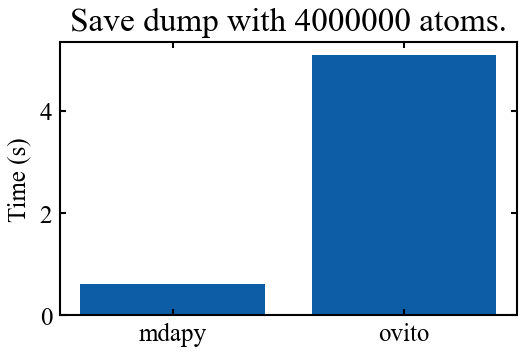

In [18]:
fig = plt.figure(figsize=(mp.cm2inch(10), mp.cm2inch(6)), dpi=150)
plt.bar([0, 1], [mdapy_time, ovito_time])
plt.xticks([0, 1], ['mdapy', 'ovito'])
plt.ylabel('Time (s)')
plt.title(f'Save dump with {N} atoms.')

### Save a data file in mdapy

In [19]:
start = time()
for _ in range(3):
    system.write_data()
end = time()
mdapy_time = (end - start)/3
print(mdapy_time, 's')

0.5910171667734782 s


### Save a data file in ovito

In [20]:
start = time()
for _ in range(3):
    ovito.io.export_file(pipeline, 'ovito.data', format='lammps/data', atom_style='atomic')
end = time()
ovito_time = (end - start)/3
print(ovito_time, 's')

5.0524570147196455 s


Text(0.5, 1.0, 'Save data with 4000000 atoms.')

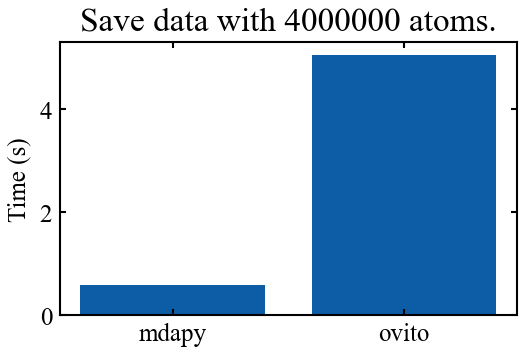

In [21]:
fig = plt.figure(figsize=(mp.cm2inch(10), mp.cm2inch(6)), dpi=150)
plt.bar([0, 1], [mdapy_time, ovito_time])
plt.xticks([0, 1], ['mdapy', 'ovito'])
plt.ylabel('Time (s)')
plt.title(f'Save data with {N} atoms.')

### Save a dump.gz file in mdapy

In [22]:
start = time()
for _ in range(3):
    system.write_dump(compress=True)
end = time()
mdapy_time = (end - start)/3
print(mdapy_time, 's')

1.5192255179087322 s


### Save a dump.gz file in ovito

In [23]:
start = time()
for _ in range(3):
    ovito.io.export_file(pipeline, 'ovito.dump.gz', format='lammps/dump', columns=["Particle Identifier", "Particle Type", "Position.X", "Position.Y", "Position.Z"])
end = time()
ovito_time = (end - start)/3
print(ovito_time, 's')

11.861988464991251 s


Text(0.5, 1.0, 'Save dump.gz with 4000000 atoms.')

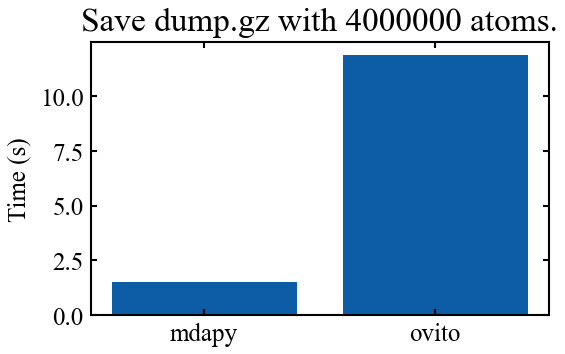

In [24]:
fig = plt.figure(figsize=(mp.cm2inch(10), mp.cm2inch(6)), dpi=150)
plt.bar([0, 1], [mdapy_time, ovito_time])
plt.xticks([0, 1], ['mdapy', 'ovito'])
plt.ylabel('Time (s)')
plt.title(f'Save dump.gz with {N} atoms.')

In [25]:
# Clear the output
import os
from glob import glob
file_list = glob('*dump*') + glob("*.data")
for file in file_list:
    try:
        os.remove(file)
    except Exception:
        pass